In [1]:
from pyspark.sql import SparkSession,Window
import pyspark.sql.functions as F

In [2]:
spark=SparkSession.builder.appName("Walmart Exercise").getOrCreate()

In [3]:
df=spark.read.csv("walmart_stock.csv",inferSchema='True',header='True')
df.show()

+----------+------------------+------------------+------------------+------------------+--------+------------------+
|      Date|              Open|              High|               Low|             Close|  Volume|         Adj Close|
+----------+------------------+------------------+------------------+------------------+--------+------------------+
|2012-01-03|         59.970001|         61.060001|         59.869999|         60.330002|12668800|52.619234999999996|
|2012-01-04|60.209998999999996|         60.349998|         59.470001|59.709998999999996| 9593300|         52.078475|
|2012-01-05|         59.349998|         59.619999|         58.369999|         59.419998|12768200|         51.825539|
|2012-01-06|         59.419998|         59.450001|         58.869999|              59.0| 8069400|          51.45922|
|2012-01-09|         59.029999|         59.549999|         58.919998|             59.18| 6679300|51.616215000000004|
|2012-01-10|             59.43|59.709998999999996|             5

In [4]:
df.columns

['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Adj Close']

In [5]:
df.describe().show()

+-------+------------------+-----------------+-----------------+-----------------+-----------------+-----------------+
|summary|              Open|             High|              Low|            Close|           Volume|        Adj Close|
+-------+------------------+-----------------+-----------------+-----------------+-----------------+-----------------+
|  count|              1258|             1258|             1258|             1258|             1258|             1258|
|   mean| 72.35785375357709|72.83938807631165| 71.9186009594594|72.38844998012726|8222093.481717011|67.23883848728146|
| stddev|  6.76809024470826|6.768186808159218|6.744075756255496|6.756859163732991|  4519780.8431556|6.722609449996857|
|    min|56.389998999999996|        57.060001|        56.299999|        56.419998|          2094900|        50.363689|
|    max|         90.800003|        90.970001|            89.25|        90.470001|         80898100|84.91421600000001|
+-------+------------------+-----------------+--

In [6]:
missing=df.select([F.count(F.when(df[i].isNull(),1)).alias(i) for i in df.columns])
missing.show()

+----+----+----+---+-----+------+---------+
|Date|Open|High|Low|Close|Volume|Adj Close|
+----+----+----+---+-----+------+---------+
|   0|   0|   0|  0|    0|     0|        0|
+----+----+----+---+-----+------+---------+



In [7]:
len(df.columns)

7

In [8]:
df.count()

1258

In [9]:
df.filter(df['High']>90).show()

+----------+---------+-----------------+---------+---------+--------+-----------------+
|      Date|     Open|             High|      Low|    Close|  Volume|        Adj Close|
+----------+---------+-----------------+---------+---------+--------+-----------------+
|2015-01-08|89.209999|90.66999799999999|    89.07|90.470001|12713600|84.91421600000001|
|2015-01-09|    90.32|        90.389999|    89.25|89.349998| 8522500|        83.862993|
|2015-01-12|89.360001|        90.309998|89.220001|90.019997| 7372500|        84.491846|
|2015-01-13|90.800003|        90.970001|    88.93|89.309998| 8215400|        83.825448|
+----------+---------+-----------------+---------+---------+--------+-----------------+



In [10]:
df.filter((df['Date']>= '2012-01-10') & (df['Date']<='2012-01-20')).show()


+----------+------------------+------------------+------------------+------------------+--------+------------------+
|      Date|              Open|              High|               Low|             Close|  Volume|         Adj Close|
+----------+------------------+------------------+------------------+------------------+--------+------------------+
|2012-01-10|             59.43|59.709998999999996|             58.98|59.040001000000004| 6907300|         51.494109|
|2012-01-11|         59.060001|         59.529999|59.040001000000004|         59.400002| 6365600|         51.808098|
|2012-01-12|59.790001000000004|              60.0|         59.400002|              59.5| 7236400|51.895315999999994|
|2012-01-13|             59.18|59.610001000000004|59.009997999999996|59.540001000000004| 7729300|51.930203999999996|
|2012-01-17|         59.869999|60.110001000000004|             59.52|         59.849998| 8500000|         52.200581|
|2012-01-18|59.790001000000004|         60.029999|         59.65

In [11]:
df.agg(F.avg('Close').alias("Average")).show()

+-----------------+
|          Average|
+-----------------+
|72.38844998012726|
+-----------------+



In [12]:
df_year=df.withColumn("Year", F.year("Date"))
df_year.show()

+----------+------------------+------------------+------------------+------------------+--------+------------------+----+
|      Date|              Open|              High|               Low|             Close|  Volume|         Adj Close|Year|
+----------+------------------+------------------+------------------+------------------+--------+------------------+----+
|2012-01-03|         59.970001|         61.060001|         59.869999|         60.330002|12668800|52.619234999999996|2012|
|2012-01-04|60.209998999999996|         60.349998|         59.470001|59.709998999999996| 9593300|         52.078475|2012|
|2012-01-05|         59.349998|         59.619999|         58.369999|         59.419998|12768200|         51.825539|2012|
|2012-01-06|         59.419998|         59.450001|         58.869999|              59.0| 8069400|          51.45922|2012|
|2012-01-09|         59.029999|         59.549999|         58.919998|             59.18| 6679300|51.616215000000004|2012|
|2012-01-10|            

In [13]:
df_year.groupBy('Year').agg(F.avg('Close').alias('Average Close Price')).show()

+----+-------------------+
|Year|Average Close Price|
+----+-------------------+
|2015|  72.49111121825403|
|2013|  75.32051611904767|
|2014|  77.32738088888888|
|2012|  67.21512003200003|
|2016|  69.54706346825398|
+----+-------------------+



In [14]:
df_filter=df.filter(df['Close']>60)
df_filter.show(2)
df_filter.sort('Date',ascending=False).show()


+----------+------------------+---------+---------+------------------+--------+------------------+
|      Date|              Open|     High|      Low|             Close|  Volume|         Adj Close|
+----------+------------------+---------+---------+------------------+--------+------------------+
|2012-01-03|         59.970001|61.060001|59.869999|         60.330002|12668800|52.619234999999996|
|2012-01-18|59.790001000000004|60.029999|59.650002|60.009997999999996| 5911400|         52.340131|
+----------+------------------+---------+---------+------------------+--------+------------------+
only showing top 2 rows

+----------+-----------------+---------+-----------------+-----------------+--------+-----------------+
|      Date|             Open|     High|              Low|            Close|  Volume|        Adj Close|
+----------+-----------------+---------+-----------------+-----------------+--------+-----------------+
|2016-12-30|        69.120003|    69.43|68.83000200000001|        69.

In [15]:
maxi=df.agg(F.max('Close').alias("Maximum Close Price"))
maxi.show()
mini=df.agg(F.min('Close').alias("Minimum Close Price"))
mini.show()

+-------------------+
|Maximum Close Price|
+-------------------+
|          90.470001|
+-------------------+

+-------------------+
|Minimum Close Price|
+-------------------+
|          56.419998|
+-------------------+



In [16]:
df=df.withColumn("Price Difference", df['High']-df['Low']).show()

+----------+------------------+------------------+------------------+------------------+--------+------------------+-------------------+
|      Date|              Open|              High|               Low|             Close|  Volume|         Adj Close|   Price Difference|
+----------+------------------+------------------+------------------+------------------+--------+------------------+-------------------+
|2012-01-03|         59.970001|         61.060001|         59.869999|         60.330002|12668800|52.619234999999996| 1.1900019999999998|
|2012-01-04|60.209998999999996|         60.349998|         59.470001|59.709998999999996| 9593300|         52.078475| 0.8799969999999959|
|2012-01-05|         59.349998|         59.619999|         58.369999|         59.419998|12768200|         51.825539|               1.25|
|2012-01-06|         59.419998|         59.450001|         58.869999|              59.0| 8069400|          51.45922| 0.5800020000000004|
|2012-01-09|         59.029999|         5

In [17]:

df_year.show()

+----------+------------------+------------------+------------------+------------------+--------+------------------+----+
|      Date|              Open|              High|               Low|             Close|  Volume|         Adj Close|Year|
+----------+------------------+------------------+------------------+------------------+--------+------------------+----+
|2012-01-03|         59.970001|         61.060001|         59.869999|         60.330002|12668800|52.619234999999996|2012|
|2012-01-04|60.209998999999996|         60.349998|         59.470001|59.709998999999996| 9593300|         52.078475|2012|
|2012-01-05|         59.349998|         59.619999|         58.369999|         59.419998|12768200|         51.825539|2012|
|2012-01-06|         59.419998|         59.450001|         58.869999|              59.0| 8069400|          51.45922|2012|
|2012-01-09|         59.029999|         59.549999|         58.919998|             59.18| 6679300|51.616215000000004|2012|
|2012-01-10|            

In [18]:
count=df_year.groupBy('Year').agg(F.count('Open').alias('Number of Records'))
count.show()

+----+-----------------+
|Year|Number of Records|
+----+-----------------+
|2015|              252|
|2013|              252|
|2014|              252|
|2012|              250|
|2016|              252|
+----+-----------------+



In [19]:
df_month=df_year.withColumn("Month",F.month('Date'))
df_month.show(2)

+----------+------------------+---------+---------+------------------+--------+------------------+----+-----+
|      Date|              Open|     High|      Low|             Close|  Volume|         Adj Close|Year|Month|
+----------+------------------+---------+---------+------------------+--------+------------------+----+-----+
|2012-01-03|         59.970001|61.060001|59.869999|         60.330002|12668800|52.619234999999996|2012|    1|
|2012-01-04|60.209998999999996|60.349998|59.470001|59.709998999999996| 9593300|         52.078475|2012|    1|
+----------+------------------+---------+---------+------------------+--------+------------------+----+-----+
only showing top 2 rows



In [20]:
df_month.groupBy('Month').agg(F.avg('Volume').alias('Average Volume')).show()

+-----+-----------------+
|Month|   Average Volume|
+-----+-----------------+
|   12|7967959.433962264|
|    1|8761851.485148516|
|    6|8303756.603773585|
|    3|7721836.448598131|
|    5|8632350.943396226|
|    9|7194450.980392157|
|    4|7956230.476190476|
|    8|7745198.181818182|
|    7|6841084.112149533|
|   10|9008785.454545455|
|   11|8921626.732673267|
|    2|9764147.422680411|
+-----+-----------------+



In [21]:
rows=df_month.filter(df_month['Close']>60).count()
rows

1177

In [22]:
df_year.groupBy('Year').agg(F.max('Close').alias('Maximum')).show()

+----+---------+
|Year|  Maximum|
+----+---------+
|2015|90.470001|
|2013|81.209999|
|2014|87.540001|
|2012|77.150002|
|2016|74.300003|
+----+---------+



In [23]:
df_year.groupBy('Year').agg(F.min('Close').alias('Minimum')).show()

+----+------------------+
|Year|           Minimum|
+----+------------------+
|2015|         56.419998|
|2013|         68.300003|
|2014|         72.660004|
|2012|57.360001000000004|
|2016|             60.84|
+----+------------------+



In [24]:
df_month.orderBy(df_month['Volume'].desc()).show(5)

+----------+------------------+------------------+------------------+------------------+--------+---------+----+-----+
|      Date|              Open|              High|               Low|             Close|  Volume|Adj Close|Year|Month|
+----------+------------------+------------------+------------------+------------------+--------+---------+----+-----+
|2015-10-14|         66.610001|         67.949997|             60.02|         60.029999|80898100|57.429177|2015|   10|
|2015-10-15|         59.700001|         60.470001|58.610001000000004|         59.330002|46253500|56.759508|2015|   10|
|2012-04-23|         59.150002|60.240002000000004|         59.130001|59.540001000000004|38007300| 52.27779|2012|    4|
|2016-05-19|         68.099998| 69.33000200000001|              67.5|         69.199997|35076700| 67.74298|2016|    5|
|2012-04-24|59.259997999999996|         59.349998|         57.650002|             57.77|30090600| 50.72368|2012|    4|
+----------+------------------+-----------------

In [25]:
df=df_month.withColumn("Year-Month",F.expr("Year || '-' || Month"))
df.show()


+----------+------------------+------------------+------------------+------------------+--------+------------------+----+-----+----------+
|      Date|              Open|              High|               Low|             Close|  Volume|         Adj Close|Year|Month|Year-Month|
+----------+------------------+------------------+------------------+------------------+--------+------------------+----+-----+----------+
|2012-01-03|         59.970001|         61.060001|         59.869999|         60.330002|12668800|52.619234999999996|2012|    1|    2012-1|
|2012-01-04|60.209998999999996|         60.349998|         59.470001|59.709998999999996| 9593300|         52.078475|2012|    1|    2012-1|
|2012-01-05|         59.349998|         59.619999|         58.369999|         59.419998|12768200|         51.825539|2012|    1|    2012-1|
|2012-01-06|         59.419998|         59.450001|         58.869999|              59.0| 8069400|          51.45922|2012|    1|    2012-1|
|2012-01-09|         59.029

In [26]:
df=df.withColumn("Salary Range",F.expr("CASE WHEN Volume>=30000000 THEN 'High'" + 
                                       "WHEN Volume<5000000 THEN 'Medium'"+
                                       "ELSE 'Low' END"))
df.show(2)

+----------+------------------+---------+---------+------------------+--------+------------------+----+-----+----------+------------+
|      Date|              Open|     High|      Low|             Close|  Volume|         Adj Close|Year|Month|Year-Month|Salary Range|
+----------+------------------+---------+---------+------------------+--------+------------------+----+-----+----------+------------+
|2012-01-03|         59.970001|61.060001|59.869999|         60.330002|12668800|52.619234999999996|2012|    1|    2012-1|         Low|
|2012-01-04|60.209998999999996|60.349998|59.470001|59.709998999999996| 9593300|         52.078475|2012|    1|    2012-1|         Low|
+----------+------------------+---------+---------+------------------+--------+------------------+----+-----+----------+------------+
only showing top 2 rows



In [27]:
df.select('Date', 'Open', 'High', 'Low','Close','Volume').sort('Volume',ascending=False).show(5)

+----------+------------------+------------------+------------------+------------------+--------+
|      Date|              Open|              High|               Low|             Close|  Volume|
+----------+------------------+------------------+------------------+------------------+--------+
|2015-10-14|         66.610001|         67.949997|             60.02|         60.029999|80898100|
|2015-10-15|         59.700001|         60.470001|58.610001000000004|         59.330002|46253500|
|2012-04-23|         59.150002|60.240002000000004|         59.130001|59.540001000000004|38007300|
|2016-05-19|         68.099998| 69.33000200000001|              67.5|         69.199997|35076700|
|2012-04-24|59.259997999999996|         59.349998|         57.650002|             57.77|30090600|
+----------+------------------+------------------+------------------+------------------+--------+
only showing top 5 rows



In [28]:
av=df.groupBy('Year','Month').agg(F.avg('Close').alias('Average'))
av.show(5)
av.sort('Year','Month',ascending=[False,False]).show(5)

+----+-----+-----------------+
|Year|Month|          Average|
+----+-----+-----------------+
|2012|   10|75.30619061904761|
|2015|    2|85.52315805263159|
|2014|    4|77.80857085714285|
|2015|   12|59.98681827272728|
|2016|    7|73.54149939999999|
+----+-----+-----------------+
only showing top 5 rows

+----+-----+-----------------+
|Year|Month|          Average|
+----+-----+-----------------+
|2016|   12|70.51904728571428|
|2016|   11|70.30476261904762|
|2016|   10|69.23952366666666|
|2016|    9|72.00857180952381|
|2016|    8| 72.8300000869565|
+----+-----+-----------------+
only showing top 5 rows



In [29]:
highest=df.groupby('Month').agg(F.avg('Close').alias('Average'))
highest.show(2)
highest.sort('Average',ascending=False).show(1)

+-----+-----------------+
|Month|          Average|
+-----+-----------------+
|   12|72.84792478301885|
|    1|71.44801958415842|
+-----+-----------------+
only showing top 2 rows

+-----+-----------------+
|Month|          Average|
+-----+-----------------+
|    7|74.43971943925233|
+-----+-----------------+
only showing top 1 row



In [30]:
windowSpec=Window.partitionBy("year").orderBy('High')

df=df.withColumn("Lag",F.lag("High").over(windowSpec))
df=df.withColumn("Difference", df['High']-df['Lag'])
df.show(2)


+----------+---------+---------+------------------+------------------+--------+---------+----+-----+----------+------------+-----+-------------------+
|      Date|     Open|     High|               Low|             Close|  Volume|Adj Close|Year|Month|Year-Month|Salary Range|  Lag|         Difference|
+----------+---------+---------+------------------+------------------+--------+---------+----+-----+----------+------------+-----+-------------------+
|2012-04-25|    57.91|    58.43|             57.18|57.360001000000004|28011800|50.363689|2012|    4|    2012-4|         Low| NULL|               NULL|
|2012-02-27|58.700001|58.779999|58.290001000000004|58.459998999999996|12258800|50.988237|2012|    2|    2012-2|         Low|58.43|0.34999899999999684|
+----------+---------+---------+------------------+------------------+--------+---------+----+-----+----------+------------+-----+-------------------+
only showing top 2 rows



In [31]:
windowSpec=Window.partitionBy("year").orderBy('High')
df=df.withColumn("Lead",F.lead("High").over(windowSpec))
df.show(3)
 

+----------+---------+---------+------------------+------------------+--------+---------+----+-----+----------+------------+---------+-------------------+---------+
|      Date|     Open|     High|               Low|             Close|  Volume|Adj Close|Year|Month|Year-Month|Salary Range|      Lag|         Difference|     Lead|
+----------+---------+---------+------------------+------------------+--------+---------+----+-----+----------+------------+---------+-------------------+---------+
|2012-04-25|    57.91|    58.43|             57.18|57.360001000000004|28011800|50.363689|2012|    4|    2012-4|         Low|     NULL|               NULL|58.779999|
|2012-02-27|58.700001|58.779999|58.290001000000004|58.459998999999996|12258800|50.988237|2012|    2|    2012-2|         Low|    58.43|0.34999899999999684|58.900002|
|2012-02-23|    58.59|58.900002|58.209998999999996|58.540001000000004|14880300|51.058014|2012|    2|    2012-2|         Low|58.779999|0.12000300000000408|58.950001|
+---------

In [32]:
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.regression import LinearRegression

In [33]:
data = [
    (1.0, 10.0), (1.5, 15.0), (2.0, 20.0), (2.5, 25.0), (3.0, 30.0),
    (3.5, 35.0), (4.0, 40.0), (4.5, 45.0), (5.0, 50.0), (5.5, 55.0),
    (6.0, 60.0), (6.5, 65.0), (7.0, 70.0), (7.5, 75.0), (8.0, 80.0),
    (8.5, 85.0), (9.0, 90.0), (9.5, 95.0), (10.0, 100.0), (10.5, 105.0),
    (11.0, 110.0), (11.5, 115.0), (12.0, 120.0), (12.5, 125.0), (13.0, 130.0),
    (13.5, 135.0), (14.0, 140.0), (14.5, 145.0), (15.0, 150.0), (15.5, 155.0),
    (16.0, 160.0), (16.5, 165.0), (17.0, 170.0), (17.5, 175.0), (18.0, 180.0),
    (18.5, 185.0), (19.0, 190.0), (19.5, 195.0), (20.0, 200.0), (20.5, 205.0),
    (21.0, 210.0), (21.5, 215.0), (22.0, 220.0), (22.5, 225.0), (23.0, 230.0),
    (23.5, 235.0), (24.0, 240.0), (24.5, 245.0), (25.0, 250.0), (25.5, 255.0)
]

columns = ["Study_Hours", "Score"]
df = spark.createDataFrame(data, columns)
df.show()




+-----------+-----+
|Study_Hours|Score|
+-----------+-----+
|        1.0| 10.0|
|        1.5| 15.0|
|        2.0| 20.0|
|        2.5| 25.0|
|        3.0| 30.0|
|        3.5| 35.0|
|        4.0| 40.0|
|        4.5| 45.0|
|        5.0| 50.0|
|        5.5| 55.0|
|        6.0| 60.0|
|        6.5| 65.0|
|        7.0| 70.0|
|        7.5| 75.0|
|        8.0| 80.0|
|        8.5| 85.0|
|        9.0| 90.0|
|        9.5| 95.0|
|       10.0|100.0|
|       10.5|105.0|
+-----------+-----+
only showing top 20 rows



In [34]:
assembler = VectorAssembler(inputCols=["Study_Hours"], outputCol="features")
df_features = assembler.transform(df)
df_features.show()
train_data, test_data = df_features.randomSplit([0.8, 0.2])
lr = LinearRegression(featuresCol="features", labelCol="Score")
lr_model = lr.fit(train_data)
test_results = lr_model.evaluate(test_data)

predictions = lr_model.transform(test_data)
predictions.show()

predictions.select("features", "Score", "prediction").show()

df_panda=predictions.toPandas()


+-----------+-----+--------+
|Study_Hours|Score|features|
+-----------+-----+--------+
|        1.0| 10.0|   [1.0]|
|        1.5| 15.0|   [1.5]|
|        2.0| 20.0|   [2.0]|
|        2.5| 25.0|   [2.5]|
|        3.0| 30.0|   [3.0]|
|        3.5| 35.0|   [3.5]|
|        4.0| 40.0|   [4.0]|
|        4.5| 45.0|   [4.5]|
|        5.0| 50.0|   [5.0]|
|        5.5| 55.0|   [5.5]|
|        6.0| 60.0|   [6.0]|
|        6.5| 65.0|   [6.5]|
|        7.0| 70.0|   [7.0]|
|        7.5| 75.0|   [7.5]|
|        8.0| 80.0|   [8.0]|
|        8.5| 85.0|   [8.5]|
|        9.0| 90.0|   [9.0]|
|        9.5| 95.0|   [9.5]|
|       10.0|100.0|  [10.0]|
|       10.5|105.0|  [10.5]|
+-----------+-----+--------+
only showing top 20 rows

+-----------+-----+--------+------------------+
|Study_Hours|Score|features|        prediction|
+-----------+-----+--------+------------------+
|        2.0| 20.0|   [2.0]| 19.99999999999995|
|        7.5| 75.0|   [7.5]|              75.0|
|       11.0|110.0|  [11.0]|110.000000

In [35]:
slope = lr_model.coefficients


print(f"Slope (Coefficient): {slope}")


Slope (Coefficient): [10.000000000000007]


In [36]:
import matplotlib.pyplot as plt

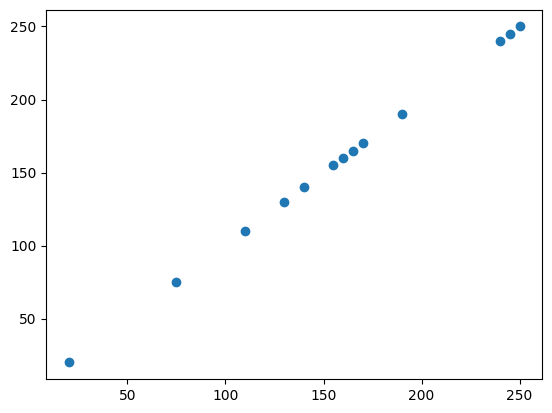

In [37]:
plt.scatter(df_panda['Score'],df_panda['prediction'])

In [38]:
spark.stop()

In [39]:

data = [
    (1.0, 10.0), (1.5, 15.0), (2.0, 20.0), (2.5, 25.0), (3.0, 30.0),
    (3.5, 35.0), (4.0, 40.0), (4.5, 45.0), (5.0, 50.0), (5.5, 55.0),
    (6.0, 60.0), (6.5, 65.0), (7.0, 70.0), (7.5, 75.0), (8.0, 80.0),
    (8.5, 85.0), (9.0, 90.0), (9.5, 95.0), (10.0, 100.0), (10.5, 105.0),
    (11.0, 110.0), (11.5, 115.0), (12.0, 120.0), (12.5, 125.0), (13.0, 130.0),
    (13.5, 135.0), (14.0, 140.0), (14.5, 145.0), (15.0, 150.0), (15.5, 155.0),
    (16.0, 160.0), (16.5, 165.0), (17.0, 170.0), (17.5, 175.0), (18.0, 180.0),
    (18.5, 185.0), (19.0, 190.0), (19.5, 195.0), (20.0, 200.0), (20.5, 205.0),
    (21.0, 210.0), (21.5, 215.0), (22.0, 220.0), (22.5, 225.0), (23.0, 230.0),
    (23.5, 235.0), (24.0, 240.0), (24.5, 245.0), (25.0, 250.0), (25.5, 255.0)
]


x = [point[0] for point in data]
y = [point[1] for point in data]

N = len(data)
sum_x = sum(x)
sum_y = sum(y)
sum_xy = sum(xi * yi for xi, yi in zip(x, y))
sum_x2 = sum(xi ** 2 for xi in x)


m = (N * sum_xy - sum_x * sum_y) / (N * sum_x2 - sum_x ** 2)
b = (sum_y - m * sum_x) / N

print("Slope {0}".format(m))
print("Intercept {0}".format(b))




Slope 10.0
Intercept 0.0


In [40]:
Scores={}
def predict(x,m,b):
    y=m*x+b
    Scores[float(x)]=float(y)
    
for i in df_panda['features']:
    predict(i[0],m,b)
    

print(Scores)

{2.0: 20.0, 7.5: 75.0, 11.0: 110.0, 13.0: 130.0, 14.0: 140.0, 15.5: 155.0, 16.0: 160.0, 16.5: 165.0, 17.0: 170.0, 19.0: 190.0, 24.0: 240.0, 24.5: 245.0, 25.0: 250.0}


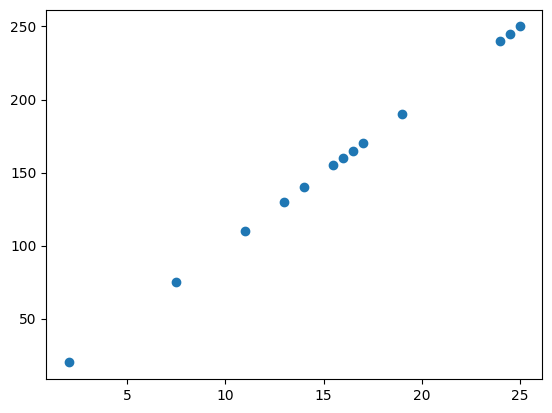

In [41]:
plt.scatter(Scores.keys(),Scores.values())

In [42]:
spark.stop()